In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
train_df = pd.read_csv('heart_train.csv')
test_df = pd.read_csv('heart_test.csv')

In [42]:
train_df.head()

,Number,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,132,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
1,202,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
2,196,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
3,75,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
4,176,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0


**Data Information,description and handling missing values:**

In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Number    242 non-null    int64  
 1   age       242 non-null    int64  
 2   sex       242 non-null    int64  
 3   cp        242 non-null    int64  
 4   trtbps    242 non-null    int64  
 5   chol      242 non-null    int64  
 6   fbs       242 non-null    int64  
 7   restecg   242 non-null    int64  
 8   thalachh  242 non-null    int64  
 9   exng      242 non-null    int64  
 10  oldpeak   242 non-null    float64
 11  slp       242 non-null    int64  
 12  caa       242 non-null    int64  
 13  thall     242 non-null    int64  
 14  output    242 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 28.5 KB


In [44]:
train_df.describe()

,Number,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,150.185950,54.462810,0.657025,0.991736,130.359504,246.842975,0.128099,0.553719,150.115702,0.314050,1.013223,1.421488,0.681818,2.301653,0.549587
std,86.855884,9.204492,0.475687,1.022533,16.828858,52.795465,0.334893,0.530410,22.352398,0.465098,1.102577,0.607724,0.990620,0.593811,0.498566
min,0.000000,29.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.250000,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,152.000000,55.500000,1.000000,1.000000,130.000000,239.500000,0.000000,1.000000,154.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,221.750000,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,165.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,302.000000,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


# EDA:

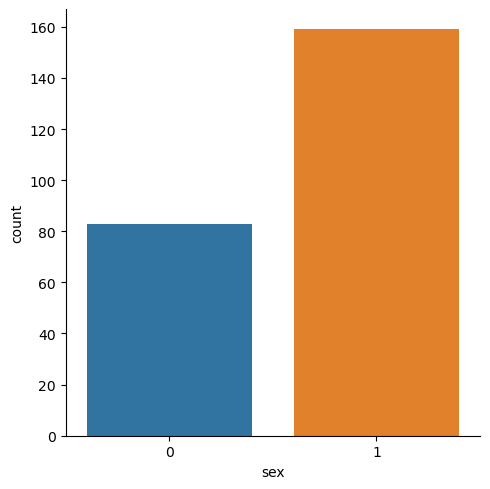

In [11]:
sns.catplot(x="sex", kind="count",data=train_df)
plt.show()

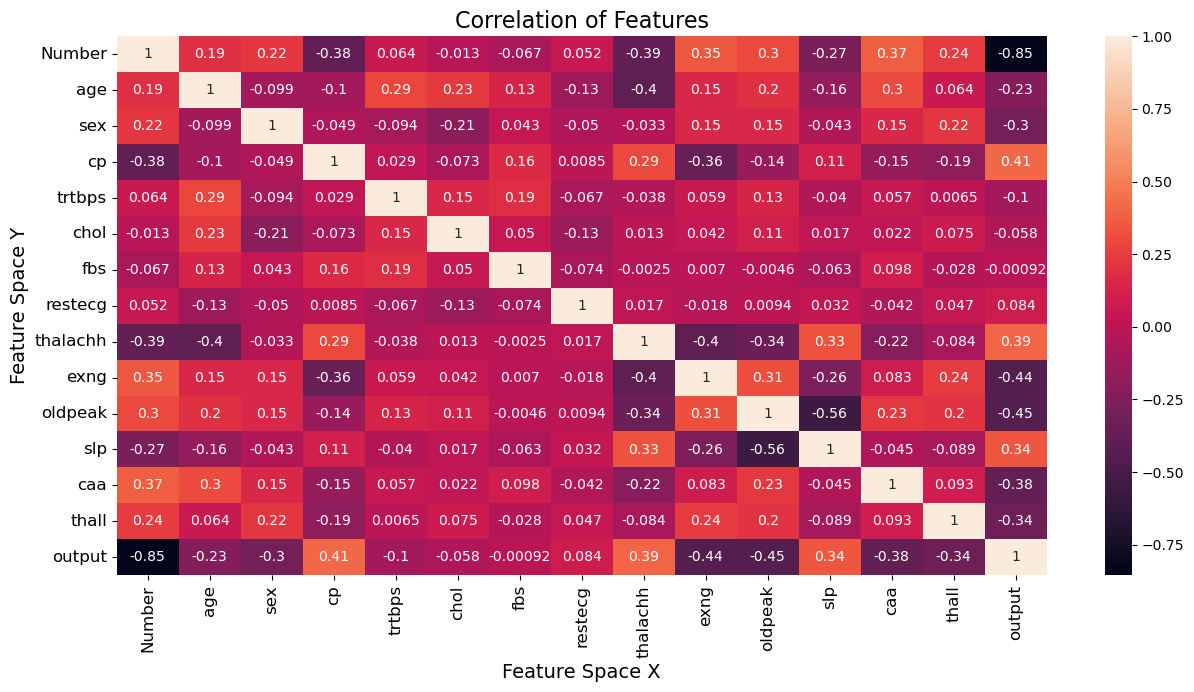

In [12]:
figure = plt.figure(figsize=[15, 7])
sns.heatmap(data=train_df.corr(), annot=True)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

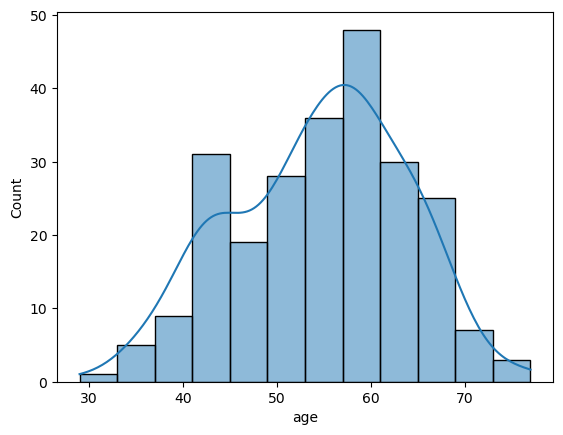

In [13]:
sns.histplot(data = train_df, x= "age", kde = True)
plt.show()

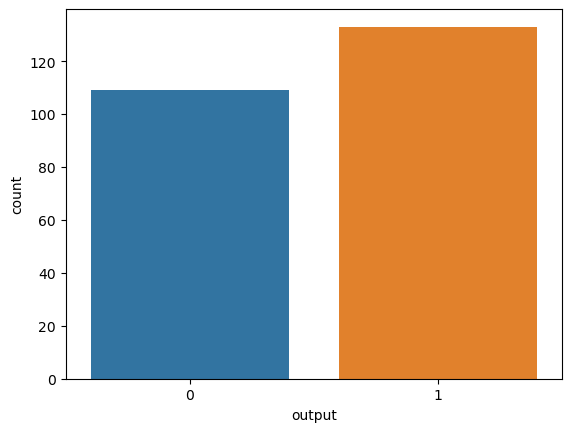

In [14]:
sns.countplot(data = train_df, x = 'output')
plt.show()

**Handling outliers:**

In [45]:
Q1 = train_df.iloc[:, 1:].quantile(0.25)
Q3 = train_df.iloc[:, 1:].quantile(0.75)
IQR = Q3-Q1
print('*********** InterQuartile Range ***********')
print(IQR)

*********** InterQuartile Range ***********
age         13.00
sex          1.00
cp           2.00
trtbps      20.00
chol        62.75
fbs          0.00
restecg      1.00
thalachh    29.75
exng         1.00
oldpeak      1.60
slp          1.00
caa          1.00
thall        1.00
output       1.00
dtype: float64


In [46]:
df_train = train_df[~((train_df<(Q1-1.5*IQR))|(train_df>(Q3+1.5*IQR))).any(axis=1)]
df_train.shape

(187, 15)

**Train-Test Split:**

In [47]:
x = df_train.iloc[:, 1:14]
y = df_train['output']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [49]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(130, 13)
(57, 13)
(130,)
(57,)


# 1. Logistic Regression:

In [50]:
model = LogisticRegression()

In [51]:
model.fit(x_train, y_train)

LogisticRegression()

In [52]:
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

In [53]:
def modelEval(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    class_rep = classification_report(actual, predicted)
    print(cm)
    print('The accuracy of the Model is :', accuracy)
    print(class_rep)

In [54]:
print('                    Training Report                           ')
modelEval(y_train, pred_train)

                    Training Report                           
[[42 14]
 [ 4 70]]
The accuracy of the Model is : 0.8615384615384616
              precision    recall  f1-score   support

           0       0.91      0.75      0.82        56
           1       0.83      0.95      0.89        74

    accuracy                           0.86       130
   macro avg       0.87      0.85      0.85       130
weighted avg       0.87      0.86      0.86       130



In [55]:
print('                  Testing Report                               ')
modelEval(y_test, pred_test)

                  Testing Report                               
[[20  3]
 [ 3 31]]
The accuracy of the Model is : 0.8947368421052632
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        23
           1       0.91      0.91      0.91        34

    accuracy                           0.89        57
   macro avg       0.89      0.89      0.89        57
weighted avg       0.89      0.89      0.89        57



# 2.DecisionTreeClassifier:

In [61]:
dtree = DecisionTreeClassifier(max_depth = 6, random_state = 0)

In [62]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [63]:
pred_dt_train = dtree.predict(x_train)
pred_dt_test = dtree.predict(x_test)

In [64]:
print('                    Training Report                           ')
modelEval(y_train, pred_dt_train)

                    Training Report                           
[[54  2]
 [ 0 74]]
The accuracy of the Model is : 0.9846153846153847
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.97      1.00      0.99        74

    accuracy                           0.98       130
   macro avg       0.99      0.98      0.98       130
weighted avg       0.99      0.98      0.98       130



In [65]:
print('                  Testing Report                               ')
modelEval(y_test, pred_dt_test)

                  Testing Report                               
[[19  4]
 [ 5 29]]
The accuracy of the Model is : 0.8421052631578947
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        23
           1       0.88      0.85      0.87        34

    accuracy                           0.84        57
   macro avg       0.84      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57



# 3.RandomForestClassifier:

In [71]:
rfc = RandomForestClassifier(n_estimators=500)

In [72]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500)

In [73]:
pred_rf_train = rfc.predict(x_train)
pred_rf_test = rfc.predict(x_test)

In [74]:
print('                    Training Report                           ')
modelEval(y_train, pred_rf_train)

                    Training Report                           
[[56  0]
 [ 0 74]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        74

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130



In [75]:
print('                  Testing Report                               ')
modelEval(y_test, pred_rf_test)

                  Testing Report                               
[[21  2]
 [ 1 33]]
The accuracy of the Model is : 0.9473684210526315
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.94      0.97      0.96        34

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57



# XGBClassifier:

In [76]:
xgb = XGBClassifier()

In [77]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [78]:
pred_xg_train = xgb.predict(x_train)
pred_xg_test = xgb.predict(x_test)

In [79]:
print('                    Training Report                           ')
modelEval(y_train, pred_xg_train)

                    Training Report                           
[[56  0]
 [ 0 74]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        74

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130



In [80]:
print('                  Testing Report                               ')
modelEval(y_test, pred_xg_test)

                  Testing Report                               
[[22  1]
 [ 1 33]]
The accuracy of the Model is : 0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.97      0.97      0.97        34

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



In [81]:
test_df.head()

,Number,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
1,228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
2,111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
3,246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
4,60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [82]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Number    61 non-null     int64  
 1   age       61 non-null     int64  
 2   sex       61 non-null     int64  
 3   cp        61 non-null     int64  
 4   trtbps    61 non-null     int64  
 5   chol      61 non-null     int64  
 6   fbs       61 non-null     int64  
 7   restecg   61 non-null     int64  
 8   thalachh  61 non-null     int64  
 9   exng      61 non-null     int64  
 10  oldpeak   61 non-null     float64
 11  slp       61 non-null     int64  
 12  caa       61 non-null     int64  
 13  thall     61 non-null     int64  
 14  output    61 non-null     int64  
dtypes: float64(1), int64(14)
memory usage: 7.3 KB


In [83]:
Q1 = test_df.iloc[:, 1:].quantile(0.25)
Q3 = test_df.iloc[:, 1:].quantile(0.75)
IQR = Q3-Q1
print('*********** InterQuartile Range ***********')
print(IQR)

*********** InterQuartile Range ***********
age         14.0
sex          0.0
cp           2.0
trtbps      26.0
chol        65.0
fbs          0.0
restecg      1.0
thalachh    36.0
exng         1.0
oldpeak      1.9
slp          1.0
caa          2.0
thall        1.0
output       1.0
dtype: float64


In [84]:
df_test = test_df[~((test_df<(Q1-1.5*IQR))|(test_df>(Q3+1.5*IQR))).any(axis=1)]
df_test.shape

(36, 15)

In [86]:
test_heart = df_test.iloc[:, 1:14]

In [89]:
predicted_test = xgb.predict(test_heart)

In [90]:
predicted_test

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [91]:
test_heart['output_status'] = predicted_test 

In [93]:
test_heart.to_csv('submission_heart.csv', index = False, header = False)